# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ... $,

$$ R(a,a^*) = \mathbb{E}[aX - (X+\varepsilon)]^2$$

$$ R(a,a^*) = \mathbb{E}[(a-1)X - \varepsilon]^2$$

$$ R(a,a^*) = (a-1)\mathbb{E}[X^2] - 2(a-1)\mathbb{E}[X\varepsilon] +\mathbb{E}[\varepsilon^2]$$


$$ R(a,a^*) =  (a-1) - 2(a-1)\mathbb{E}[X]\mathbb{E}[\varepsilon] +\sigma^2$$
$$ R(a,a^*) = (a-1) + \sigma^2$$

In our task we know $a^* = 1$.




In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(23)

In [2]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [3]:
# sampling
n = 50
sigma_eps = 1

X = rng.normal(0, 1, n)
epsilon = rng.normal(0, sigma_eps, n)
Y = X + epsilon


Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean((y - a*x)**2)

In [5]:
empirical_risk(1, X, Y)

1.3015145207158252

In [6]:
population_risk(1, sigma_eps)

1

### c)

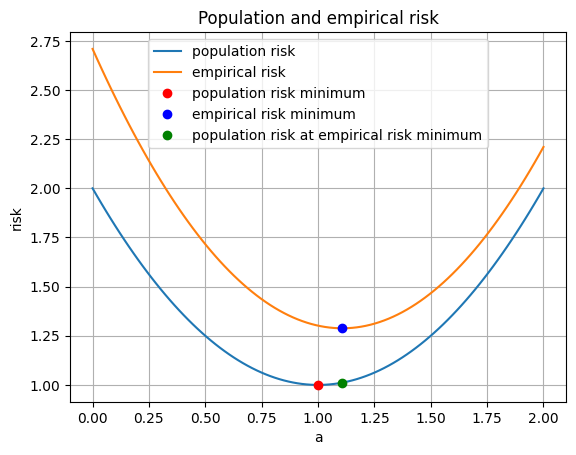

In [7]:
# code, plot
argmin_pop = 1
min_pop = population_risk(argmin_pop, sigma_eps)

argmin_emp = np.mean(Y*X) / np.mean(X**2)
min_emp = empirical_risk(argmin_emp, X, Y)

pop_risk_at_argmin_emp = population_risk(argmin_emp, sigma_eps)
A = np.linspace(0, 2, 100)
pop_risks = [population_risk(a, sigma_eps) for a in A]
emp_risks = [empirical_risk(a, X, Y) for a in A]

import matplotlib.pyplot as plt
plt.grid()
plt.plot(A, pop_risks, label='population risk')
plt.plot(A, emp_risks, label='empirical risk')

plt.xlabel('a')
plt.ylabel('risk')

plt.plot(argmin_pop, min_pop, 'ro', label='population risk minimum')
plt.plot(argmin_emp, min_emp, 'bo', label='empirical risk minimum')
plt.plot(argmin_emp, pop_risk_at_argmin_emp, 'go', label='population risk at empirical risk minimum')


plt.title('Population and empirical risk')
plt.legend()
plt.show()


### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [8]:
def calculate_a_hat(X, Y):
    return np.mean(Y*X) / np.mean(X**2)

def excess_risk(a_hat, a_star = 1, sigma_eps = 1):
    return population_risk(a_hat, sigma_eps) - population_risk(a_star, sigma_eps)

0.02419814412359024


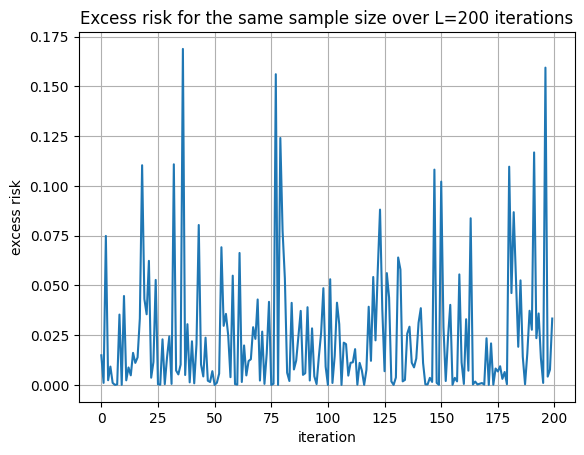

In [9]:
# simulations with fixed sample size

L = 200
n = 50
ex_risk = []
for i in range(200):
    X = rng.normal(0, 1, n)
    epsilon = rng.normal(0, sigma_eps, n)
    Y = X + epsilon
    a_hat = calculate_a_hat(X, Y)
    ex_risk.append(excess_risk(a_hat))

ex_risk = np.array(ex_risk)
print(np.mean(ex_risk))

plt.grid()
plt.plot(ex_risk)
plt.title('Excess risk for the same sample size over L=200 iterations')
plt.xlabel('iteration')
plt.ylabel('excess risk')
plt.show()

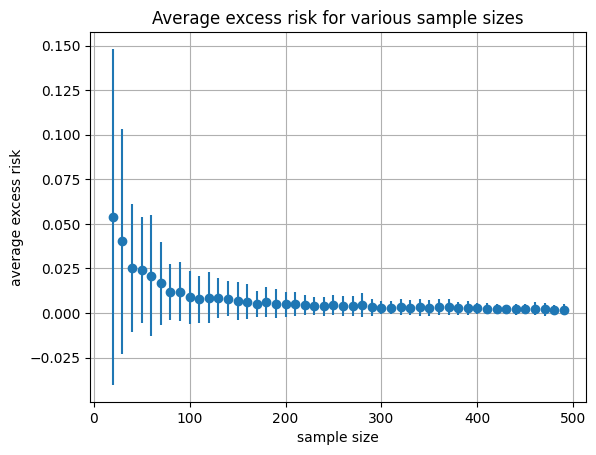

In [10]:
# simulations for various sample sizes
L = 200
ns = [n for n in range(20, 500, 10)]

ex_risks = np.zeros(shape = (L, len(ns)))

for i in range(L):
    for j, n in enumerate(ns):
        X = rng.normal(0, 1, n)
        epsilon = rng.normal(0, sigma_eps, n)
        Y = X + epsilon
        a_hat = calculate_a_hat(X, Y)
        ex_risks[i, j] = excess_risk(a_hat)

ex_risks = pd.DataFrame(ex_risks, columns = ns)

mean_ex_risks = ex_risks.mean()
std_ex_risks = ex_risks.std()

plt.grid()
plt.errorbar(ns, mean_ex_risks, yerr = std_ex_risks, fmt = 'o')
plt.xlabel('sample size')
plt.ylabel('average excess risk')
plt.title('Average excess risk for various sample sizes')
plt.show()
